In [1]:
# Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import shap

In [9]:
# Load the data
df = pd.read_csv(r'C:\Users\Asus\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [10]:
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [11]:
# Check for null values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Asus\WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(df.columns.tolist())

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [13]:
df.columns = df.columns.str.strip()        # Remove spaces
df.columns = df.columns.str.lower()        # Lowercase for consistency

<Axes: xlabel='attrition', ylabel='count'>

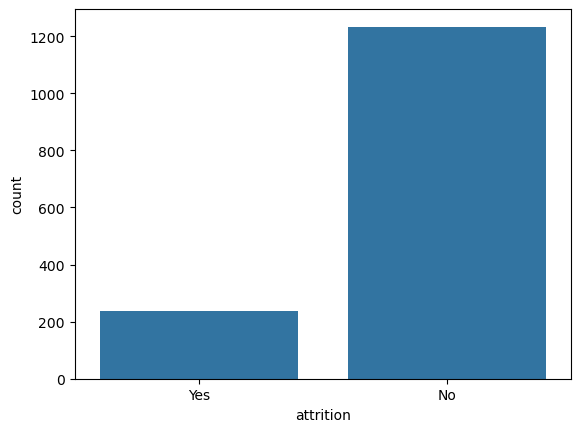

In [14]:
sns.countplot(data=df, x='attrition')

In [16]:
print(df.columns.tolist())

['age', 'attrition', 'businesstravel', 'dailyrate', 'department', 'distancefromhome', 'education', 'educationfield', 'employeecount', 'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'over18', 'overtime', 'percentsalaryhike', 'performancerating', 'relationshipsatisfaction', 'standardhours', 'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']


<Axes: xlabel='department', ylabel='count'>

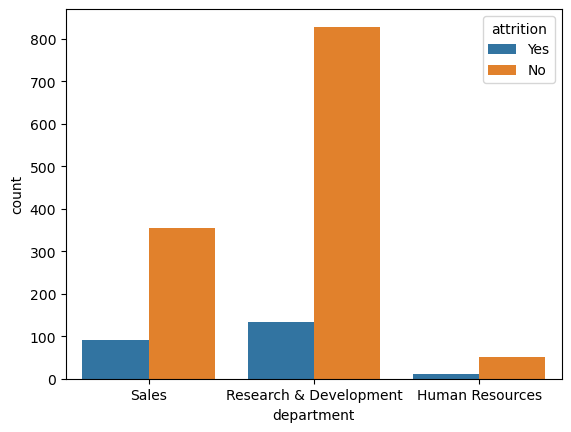

In [17]:
sns.countplot(data=df, x='department', hue='attrition')

<Axes: xlabel='attrition', ylabel='monthlyincome'>

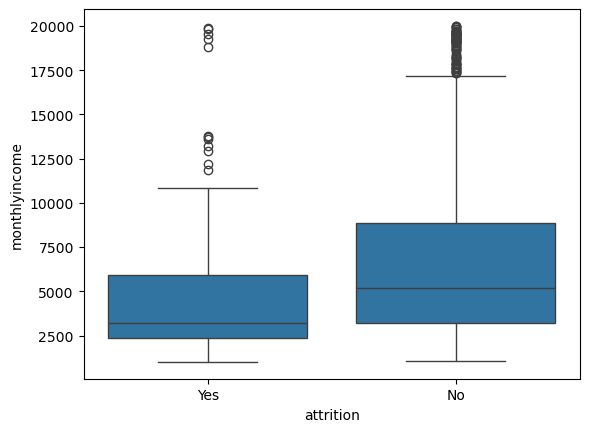

In [19]:
# ✅ Salary vs Attrition
sns.boxplot(data=df, x='attrition', y='monthlyincome')

<Axes: xlabel='yearssincelastpromotion', ylabel='count'>

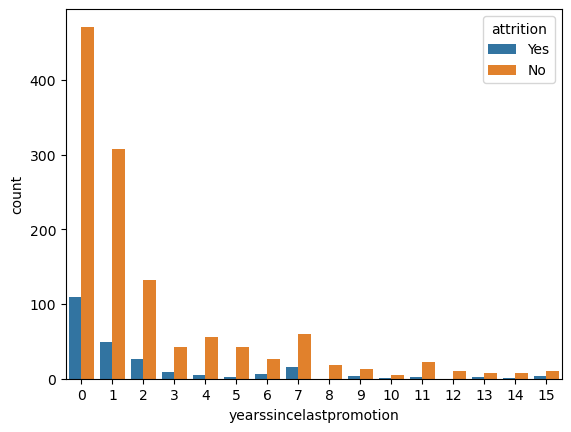

In [20]:
# ✅ Promotion vs Attrition
sns.countplot(data=df, x='yearssincelastpromotion', hue='attrition')

In [23]:
df.describe()
df.corr(numeric_only=True)

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
dailyrate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
distancefromhome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
employeecount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employeenumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
environmentsatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
hourlyrate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
jobinvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
joblevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.select_dtypes(include='object'):
    df[column] = le.fit_transform(df[column])

In [26]:
# 🟢 FIXED VERSION
X = df.drop('attrition', axis=1)
y = df['attrition']

In [27]:
# Split
X = df.drop('attrition', axis=1)
y = df['attrition']

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
# Load and clean dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.columns = df.columns.str.strip().str.lower()  # clean column names

In [33]:
# Encode categorical columns if not already done
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

In [34]:
# Train-test split
X = df.drop('attrition', axis=1)
y = df['attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Train model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
# Predict
y_pred = model.predict(X_test)

In [38]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7721088435374149
Confusion Matrix:
 [[218  37]
 [ 30   9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       255
           1       0.20      0.23      0.21        39

    accuracy                           0.77       294
   macro avg       0.54      0.54      0.54       294
weighted avg       0.79      0.77      0.78       294



In [39]:
import shap

In [40]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

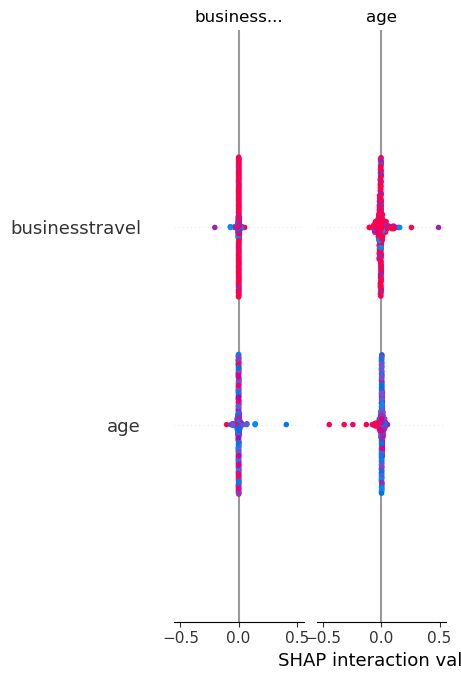

In [41]:
# Plot summary
shap.summary_plot(shap_values, X_test)

In [42]:
df.to_csv("Cleaned_HR_Data.csv", index=False)